<a href="https://colab.research.google.com/github/Bisalia/Bayesian_network/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
len(df)

11914

In [ ]:
df.shape

(11914, 16)

In [ ]:
df.columns = df.columns.str .lower().str.replace(' ', '_')

In [ ]:
string_columns = list(df.dtypes[df.dtypes=='object'].index)


In [ ]:
for col in string_columns:
  df[col]= df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

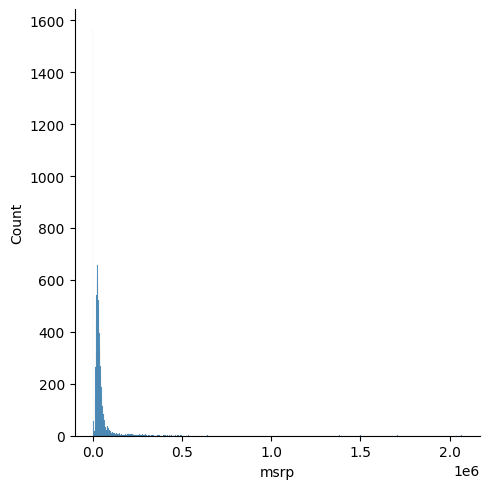

In [ ]:
sns.displot(df.msrp, kde=False)

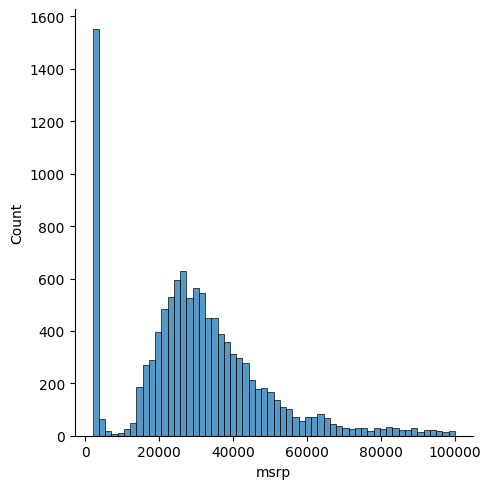

In [ ]:
sns.displot(df.msrp[df.msrp <100000], kde=False)

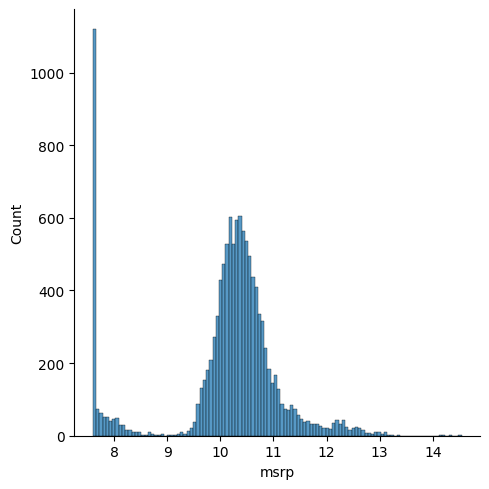

In [ ]:
log_price = np.log1p(df.msrp)
sns.displot(log_price, kde=False)

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
#split our data
n = len(df)
#20% for validation
n_val = int(0.2 * n)
#20% for test an 60% for train
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [ ]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [ ]:
df_shifle = df.iloc[idx]

In [ ]:
df_train = df_shifle.iloc[:n_train].copy()
df_val = df_shifle.iloc[n_train:n_train + n_val].copy()
df_test = df_shifle.iloc[n_train + n_val:].copy()

In [ ]:
#split our target
y_train  = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# linear regression $y = g(x)$

> [Блок с отступами](https:// [Текст ссылки](https://))


## $g(x) = w_0 + x_{i1}w_1 + x_{i2}w_2+...+x_{in}w_n$

In [ ]:
def linear_regression(X, y):
  # add the dummy column
  ones = np.ones(X.shape[0])
  X =np.column_stack([ones, X])
  #normal equation formula
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

In [ ]:
base =['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [ ]:
df_num = df_num.fillna(0)

In [ ]:
X_train = df_num.values

In [ ]:
w_0, w = linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)

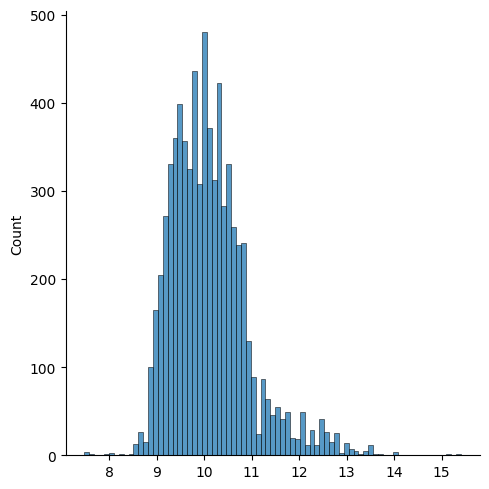

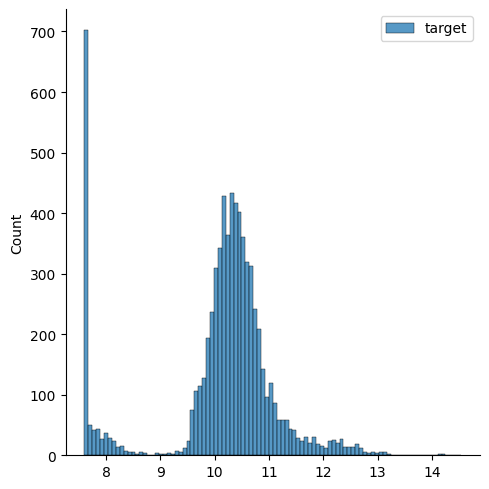

In [ ]:
sns.displot(y_pred, label='prediction')
sns.displot(y_train, label='target')
plt.legend()

In [ ]:
# RMSE
def rmse(y, y_pred):
  error = y_pred - y
  mse = (error**2).mean()
  return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

In [ ]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


validation: 0.761653099130156


In [ ]:
df_train.year.max()

2017

In [ ]:
df_train['age']= 2017-df_train.year

In [ ]:
def prepare_X(df):
  df= df.copy()
  features = base.copy()
  df['age']=2017 - df.year
  features.append('age')

  # add number doors of car
  for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    value = (df['number_of_doors']==v).astype(int)
    df[feature] = value
    features.append(feature)


  for v in ['chevrolet','ford','volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s'% v
    df[feature] =(df['make']==v).astype(int)
    features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']:
    feature = 'is_type_%s'% v
    df[feature]=(df['engine_fuel_type']==v).astype(int)
    features.append(feature)

  for v  in ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']:
    feature = 'is_transmission_%s'% v
    df[feature]=(df['transmission_type']==v).astype(int)
    features.append(feature)

  for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
    feature = 'is_driven_wheels_%s'% v
    df[feature]=(df['driven_wheels']==v).astype(int)
    features.append(feature)

  for  v in ['crossover','flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
    feature = 'is_mc_%s'% v
    df[feature] =(df['market_category']==v).astype(int)
    features.append(feature)

  for v in ['compact', 'midsize', 'large']:
    feature = 'is_size_%s'% v
    df[feature]=(df['vehicle_size']==v).astype(int)
    features.append(feature)

  for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
    feature = 'is_style_%s'% v
    df[feature]=(df['vehicle_style']==v).astype(int)
    features.append(feature)

  for v in ['silverado_1500','tundra', 'f-150', 'sierra_1500']:
    feature = 'is_model_%s'% v
    df[feature]=(df['model']==v).astype(int)
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 57.58833979978856


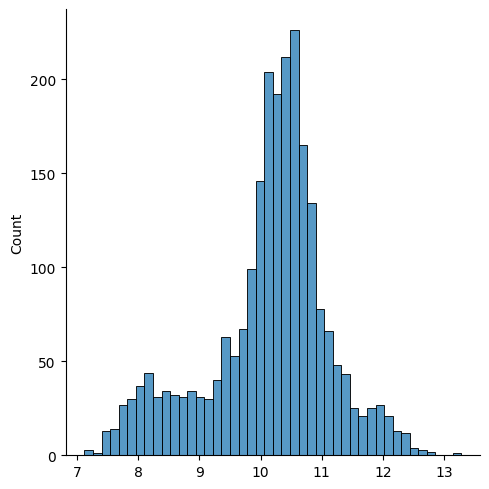

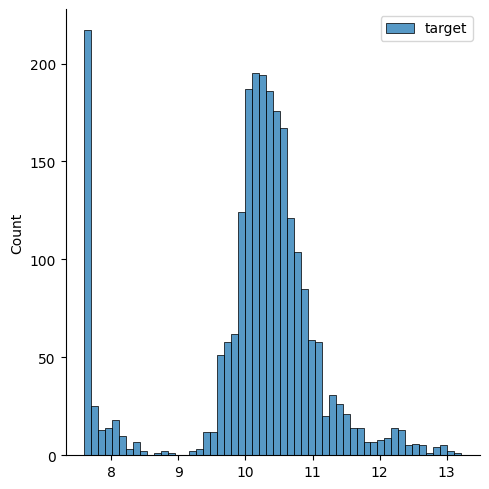

In [ ]:
sns.displot(y_pred, label='prediction')
sns.displot(y_val, label='target')
plt.legend()

In [ ]:
df['model'].value_counts().head()


silverado_1500        156
tundra                140
f-150                 126
sierra_1500            90
beetle_convertible     89
Name: model, dtype: int64

#Regularization
##w = (X.T.X + aI)/X.T.y

In [ ]:
# linear regression  with regularization
def linear_regression(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)
X_val =prepare_X(df_val)

In [ ]:
for r in  [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
  W_0, w = linear_regression(X_train, y_train, r=r)
  y_pred = w_0 + X_val.dot(w)
  print('%6s'%r, rmse(y_val, y_pred))

 1e-06 5611793327609285.0
0.0001 5611793327609324.0
 0.001 5611793327609324.0
  0.01 5611793327609324.0
   0.1 5611793327609324.0
     1 5611793327609322.0
    10 5611793327609321.0


In [ ]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train, r =0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test :',rmse(y_test, y_pred) )

validation: 0.45218965783861137
test : 0.4483794341126866


In [ ]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheels_drive',
    'engine_cylinders': 6.0,
    'engine_hp': 268.0,
    'engine_fuel_type': 'regular_unleaded',
    'highway_mpg':25,
    'make': 'toyota',
    'market_category': 'crossover, performance',
    'model': 'venga',
    'number_of_doors':4.0,
    'popularity':2031,
    'transmission_t]ype': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style':'wagon',
    'year': 2013
}

In [ ]:
df.test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [ ]:
y_pred = w_0 + X_test.dot(w)

In [ ]:
suggestion = np.expm1(y_pred)
suggestion

array([ 3646.79285506, 11871.87905927, 32514.24960116, ...,
       14855.67561081, 23207.73355734, 38408.72710057])